In [151]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np
import torch
from ucimlrepo import fetch_ucirepo 
import torch.nn as nn     
import torch.nn.functional as F
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy
import main
# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Labels: Iris setosa, versicolor, virginica (0, 1, 2)

# Step 2: Preprocess the data (scaling for better t-SNE performance)
X = StandardScaler().fit_transform(X)  # St andardize the features

# Step 3: Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=20, n_iter=2000)
X_tsne = tsne.fit_transform(X)
X_centered=X_tsne-X_tsne.mean(axis=0)
X_centered=torch.from_numpy(X_tsne)
X_normalized = (X_centered - X_centered.mean(axis=0)) / X_centered.std(axis=0)
y=torch.from_numpy(y)
y=y.long()
X_train,X_test,y_train,y_test=train_test_split(X_normalized,y,test_size=0.2)

c:\Users\Sebas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Sebas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


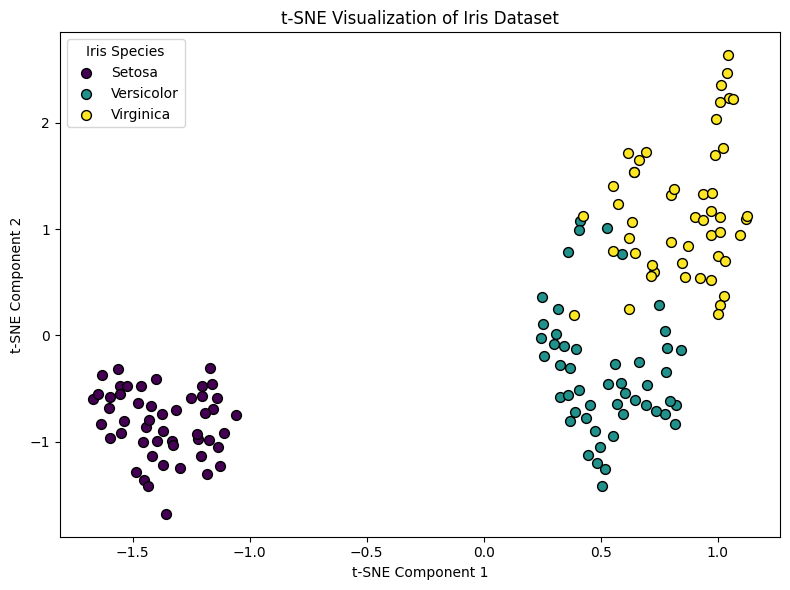

Mean of t-SNE components: [ 1.8435514  -0.02702766]
Labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])


In [207]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm  # For colormap

# Assuming X_normalized and y are already defined
plt.figure(figsize=(8, 6))

# Use the Viridis colormap
viridis = cm.get_cmap('viridis', 3)  # Get a colormap with 3 distinct colors

# Define species names
species_labels = ['Setosa', 'Versicolor', 'Virginica']  # Corresponding species names

# Create a scatter plot for each class separately
for i in range(3):  # Since we have 3 classes (0, 1, 2)
    plt.scatter(X_normalized[y == i, 0], X_normalized[y == i, 1], 
                c=[viridis(i)],  # Use colors from the Viridis colormap
                s=50, 
                edgecolor='k', 
                label=species_labels[i])  # Add label for legend

# Use the same colors for the main scatter plot (for reference)


plt.title('t-SNE Visualization of Iris Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Add legend
plt.legend(title='Iris Species', loc='best')

plt.tight_layout()
plt.show()

print("Mean of t-SNE components:", X_tsne.mean(axis=0))
print("Labels:", y)


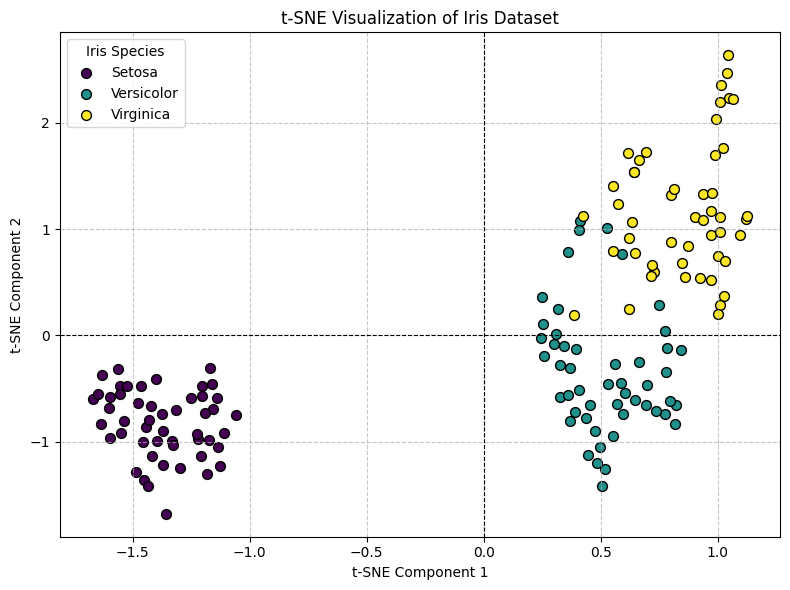

Mean of t-SNE components: [ 1.8435514  -0.02702766]
Labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])


In [210]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm  # For colormap

# Assuming X_normalized and y are already defined
plt.figure(figsize=(8, 6))

# Use the Viridis colormap
viridis = cm.get_cmap('viridis', 3)  # Get a colormap with 3 distinct colors

# Define species names
species_labels = ['Setosa', 'Versicolor', 'Virginica']  # Corresponding species names

# Create a scatter plot for each class separately
for i in range(3):  # Since we have 3 classes (0, 1, 2)
    plt.scatter(X_normalized[y == i, 0], X_normalized[y == i, 1], 
                c=[viridis(i)],  # Use colors from the Viridis colormap
                s=50, 
                edgecolor='k', 
                label=species_labels[i])  # Add label for legend

# Add coordinate axes
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Vertical line at x=0

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Title and labels
plt.title('t-SNE Visualization of Iris Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Add legend
plt.legend(title='Iris Species', loc='best')

plt.tight_layout()
plt.show()

print("Mean of t-SNE components:", X_tsne.mean(axis=0))
print("Labels:", y)


[ 1.8435514  -0.02702766]
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])


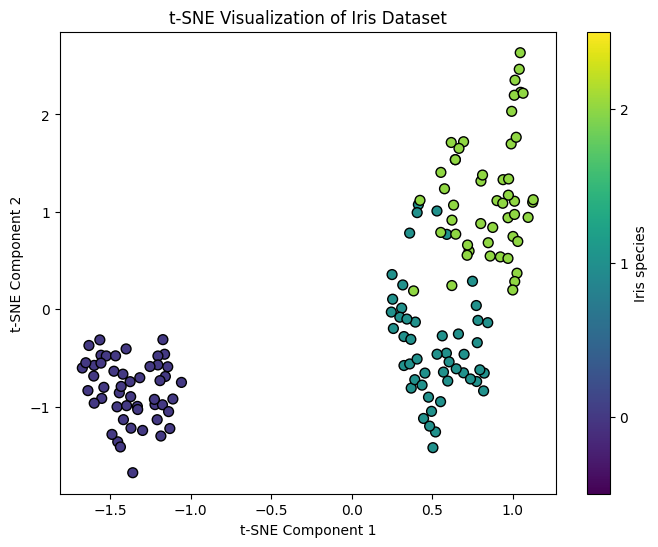

In [196]:
plt.figure(figsize=(8, 6))

scatter = plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=y, cmap='viridis', s=50,edgecolor='k')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Iris species')
plt.clim(-0.5, 2.5)  # Set the color limits for the 3 classes
plt.title('t-SNE Visualization of Iris Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
#plt.show()
print(X_tsne.mean(axis=0))

print(y)

In [163]:
class Model(nn.Module):
    def __init__(self,in_features=2,h1=16,out=3):
        super().__init__()
        self.fc1=nn.Linear(in_features,h1,bias=False)
        #self.fc2=nn.Linear(h1,h2)
        self.out=nn.Linear(h1,out)
    def forward(self,x):
        x=F.relu(self.fc1(x))
        #x=F.relu(self.fc2(x))
        x=self.out(x)
        return x
def iris_training(h1):
    model=Model(h1=h1)

    res=[copy.deepcopy(next(model.parameters())).detach().numpy().astype(float)]
    #print(W_untrained)
    criterion=nn.CrossEntropyLoss()
    optimizer=torch.optim.Adam(model.parameters(),lr=0.01)
    epochs=100
    losses=[]
    for i in range(epochs):
        y_pred=model.forward(X_train)
        loss=criterion(y_pred,y_train)
        losses.append(loss.detach().numpy())
        #if i % 10 == 0:
           # print(f'Epoch: {i} and loss: {loss}')

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        W=current=copy.deepcopy(next(model.parameters())).detach().numpy().astype(float)
        res.append(W)
    bias=get_biases(model)
    return res, bias, loss.detach().numpy()
def get_biases(model):
    biases = {}
    for name, param in model.named_parameters():
        if 'bias' in name:  # Check if the parameter is a bias
            biases[name] = param.detach().numpy()  # Store the bias values
    return biases


In [189]:
for m in range(5,15):
    print(f"start {m}")
    losses=[]
    untrained=[]
    trained=[]
    for i in range(1000):
        result=iris_training(m)
        losses.append(result[2])
        untrained.append(result[0][0])
        trained.append(result[0][-1])
    losses=np.array(losses)
    print(np.mean(losses))
    untrain=0
    for W in untrained:
    # print(W.T.shape)
        if not main.findCell(np.array([]),W):
            untrain+=1
    train=0
    for W in trained:
        if not main.findCell(np.array([]), W):
            train+=1
    print(f"m={m} untrained= {untrain},trained = {train}")

start 5
0.21923518
m=5 untrained= 55,trained = 49
start 6
0.19697069
m=6 untrained= 257,trained = 236
start 7
0.18476868
m=7 untrained= 444,trained = 415
start 8
0.17420767
m=8 untrained= 626,trained = 608
start 9
0.16790627
m=9 untrained= 772,trained = 743
start 10
0.16386393
m=10 untrained= 848,trained = 849
start 11
0.16004007
m=11 untrained= 912,trained = 892
start 12
0.15763639
m=12 untrained= 941,trained = 926
start 13
0.15613198
m=13 untrained= 953,trained = 952
start 14
0.15315276
m=14 untrained= 982,trained = 979


In [194]:
import numpy as np
import matplotlib.pyplot as plt

def cmap(W1, W2, W3, W4, W5):
    # Define grid
    R = np.linspace(-3, 3, 1000)
    X, Y = np.meshgrid(R, R)
    
    # Function to compute and return the result matrix for a weight matrix W
    def compute_res(W):
        # Stack X and Y into a (2, N) array where N is the number of points
        grid_points = np.stack([X.ravel(), Y.ravel()]).T  # Shape: (N, 2)
        
        # Efficient matrix multiplication to compute all dot products at once
        dot_products = np.dot(grid_points, W.T)  # Shape: (N, W.shape[0])
        
        # Apply the condition: dot product >= 0
        res = np.sum(dot_products >= 0, axis=1)  # Shape: (N,)
        
        # Reshape result back into grid shape
        return res.reshape(X.shape)
    
    # Create a 1x5 subplot for side-by-side visualizations
    fig, axes = plt.subplots(1, 5, figsize=(25, 5))
    
    # Define the list of weight matrices and corresponding axis titles
    Ws = [W1, W2, W3, W4, W5]
    titles = ["Before training", "After 25 training iterations", "After 50 training iterations", "After 75 training iterations", 'After 100 training iterations']
    
    # Iterate over the weight matrices and plot each one
    for i, (W, ax, title) in enumerate(zip(Ws, axes, titles)):
        res = compute_res(W)  # Get the result matrix for each weight matrix
        
        # Simplify color map handling
        colors = ["purple", "red", "orange", "yellow","lime"] + ["green"] * (W.shape[0] - 4)
        
        # Create contour plot in the corresponding subplot
        ctf = ax.contourf(X, Y, res, levels=np.arange(0, W.shape[0] + 2) - 0.5, colors=colors)
        ax.scatter(X_normalized[:,0], X_normalized[:,1],c=y, s=10,edgecolor='k')
        # Set title and labels for the subplot
        ax.set_title(title)
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
    if len(ctf.collections) > 0:
        cbar = plt.colorbar(ctf, ax=axes[4], orientation='vertical')
        cbar.set_label('Common Color Scale')
    # Adjust spacing between subplots
    plt.tight_layout()
    plt.show()


In [243]:
res,bias,loss=iris_training(6)
C=np.array([])
while not  (  main.findCell(C,res[0]) and   main.findCell(C,res[-1])):
    res,bias,loss=iris_training(6)
print(bias)

{'out.bias': array([ 0.04566514, -0.44816417, -0.37219274], dtype=float32)}


[-3.4796261871424523, 0.0]
[-3.4796261871424523, 0.0]
0.20035745


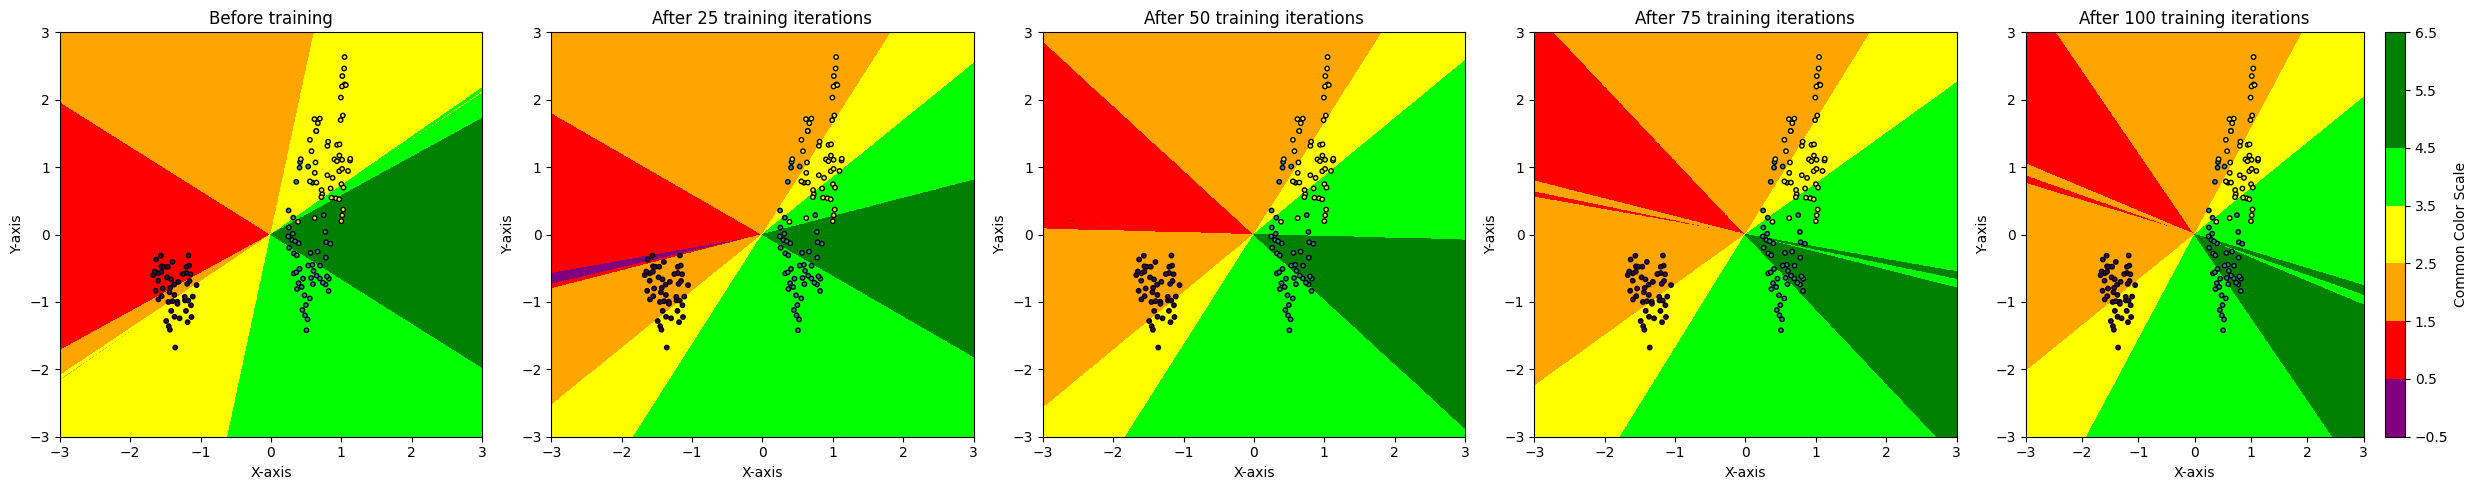

In [244]:
print(main.findCell(C,res[0]))
print(main.findCell(C,res[0]))
print(loss)
cmap(res[0],res[25],res[50],res[75],res[-1])


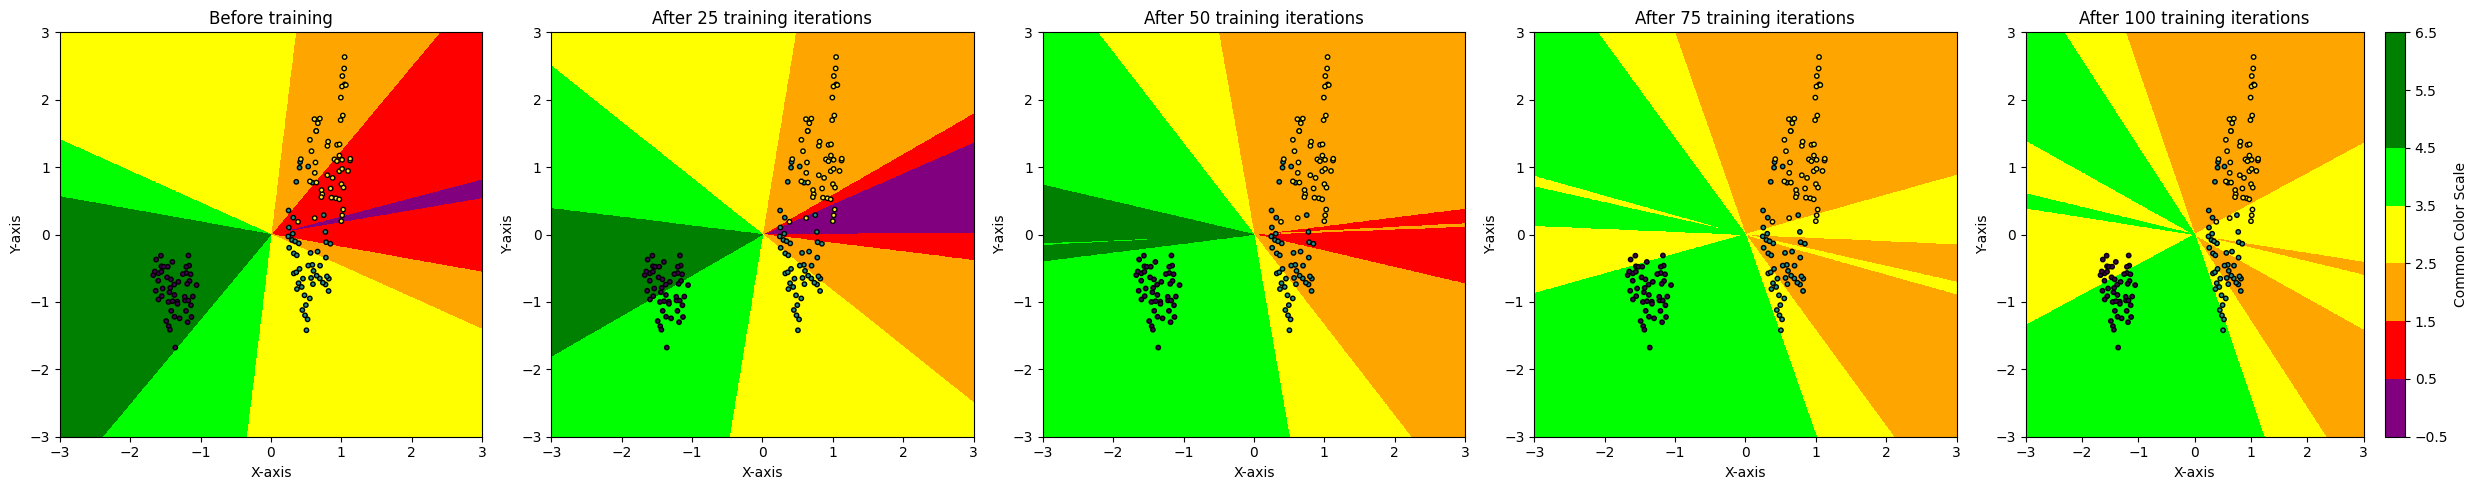

In [246]:
# Example 2
W0=np.array([[-0.13742441,  0.49953228],
 [-0.24698913, -0.52650005],
 [-0.10702342, -0.57304531],
 [-0.50999761,  0.40710706],
 [-0.70518816,  0.08214802],
 [ 0.12213135, -0.69129866]])
W1=np.array([[-0.19610307,  0.32613859],
 [-0.50867045, -0.61072981],
 [ 0.00551734, -0.83535808],
 [-0.29117513,  0.63666856],
 [-0.68294007,  0.107162  ],
 [-0.11982636, -0.93345582]])
W2=np.array([[-0.01569026,  0.38536036],
 [-0.76139575, -0.56474793],
 [ 0.05828262, -1.08458579],
 [-0.11604401,  0.89033872],
 [-0.95249671, -0.15937398],
 [-0.27380237, -1.11980283]])
W3=np.array([[ 0.15376362,  0.52506953],
 [-0.95096284, -0.66756231],
 [ 0.38013259, -1.30085289],
 [ 0.05045339,  1.11183894],
 [-1.18963671, -0.39920124],
 [-0.29743871, -1.26188505]])
W4=np.array([[ 0.2866146,   0.61350191],
 [-1.0623529,  -0.82326788],
 [ 0.65676916, -1.45912468],
 [ 0.15936826,  1.20963407],
 [-1.34320402, -0.55123889],
 [-0.27233523, -1.35277379]])
cmap(W0,W1,W2,W3,W4)

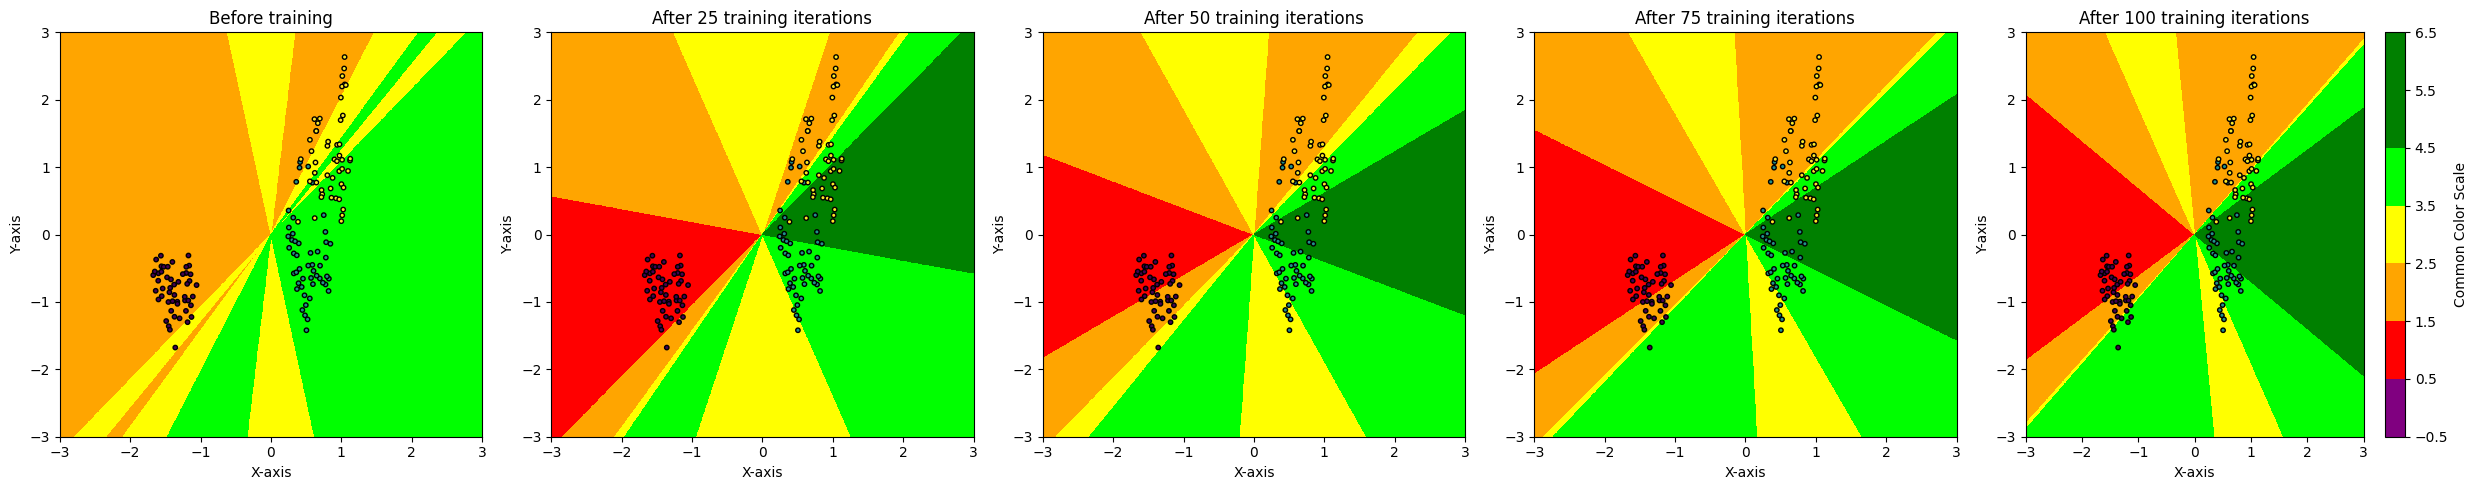

In [211]:

W0=np.array([[ 0.32121307, -0.22505531],
 [ 0.55039376, -0.26982462],
 [ 0.56889325, -0.52844012],
 [ 0.70361918,  0.14521289],
 [-0.13207668,  0.01496685],
 [-0.70588934,  0.55272931]])
W1=np.array([[ 0.33953619, -0.22137931],
 [ 0.3126584,  -0.2184079 ],
 [ 0.82802188, -0.78356636],
 [ 0.95750248 , 0.40310657],
 [ 0.03957594 , 0.20710725],
 [-0.96415269 , 0.3056432 ]])
W2= np.array([[ 0.6631462,  -0.51601654],
 [ 0.27138332, -0.44245541],
 [ 1.0908047 , -1.02247822],
 [ 1.18072844,  0.62974989],
 [ 0.16003235,  0.40288177],
 [-1.22167611,  0.08440031]])
W3=np.array([[ 0.84155273, -0.76572561],
 [ 0.40220821, -0.58191234],
 [ 1.23353457, -1.17759192],
 [ 1.32496738,  0.73259979],
 [ 0.26571122 , 0.50990957],
 [-1.40429783, -0.07544798]])
W4=np.array([[ 0.85058153, -0.90914816],
 [ 0.42238438, -0.6763767 ],
 [ 1.23006094, -1.27680719],
 [ 1.43399179,  0.7554968 ],
 [ 0.35586622,  0.51063633],
 [-1.5121423 , -0.17237228]])
cmap(W0,W1,W2,W3,W4)